## 加载数据

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
path = './data/NationalNames.csv'
data = pd.read_csv(path)

In [3]:
data.head()

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746


## 查看数据详情

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825433 entries, 0 to 1825432
Data columns (total 5 columns):
Id        int64
Name      object
Year      int64
Gender    object
Count     int64
dtypes: int64(3), object(2)
memory usage: 69.6+ MB


In [5]:
data.describe()

,Id,Year,Count
count,1.825433e+06,1.825433e+06,1.825433e+06
mean,9.127170e+05,1.972620e+03,1.846879e+02
std,5.269573e+05,3.352891e+01,1.566711e+03
min,1.000000e+00,1.880000e+03,5.000000e+00
25%,4.563590e+05,1.949000e+03,7.000000e+00
50%,9.127170e+05,1.982000e+03,1.200000e+01
75%,1.369075e+06,2.001000e+03,3.200000e+01
max,1.825433e+06,2.014000e+03,9.968000e+04


## 全美最流行的婴儿名字 TOP10

In [6]:
# 将“姓名”和其数量进行统计，并放入“字典”变量中
names_dic = dict()

# 由于数据量大，耗时较长
for index, row in data.iterrows():
    
    # 按行遍历数据
    if row['Name'] not in names_dic:
        names_dic[row['Name']] = row['Count']
    else:
        names_dic[row['Name']] += row['Count']

In [6]:
import json

In [9]:
with open('./data/names_dic.json', 'w', encoding = 'utf-8') as f:
    json.dump(names_dic, f)

In [7]:
with open('./data/names_dic.json', 'r') as f:
    names_dic = json.load(f)

In [8]:
name = 'Mary'
print('{} --> {}'.format(name, names_dic[name]))

name = 'Minnie'
print('{} --> {}'.format(name, names_dic[name]))

Mary --> 4130441
Minnie --> 159352


In [9]:
from collections import Counter

In [10]:
# 使用Counter计数器的most_common函数进行统计
# 返回最常用的元素及其计数的列表

top_10 = Counter(names_dic).most_common(10)
print('全美流行的婴儿名字top10:')
for pair in top_10:
    print('姓名：{} --> 数量：{}'.format(pair[0], pair[1]))

全美流行的婴儿名字top10:
姓名：James --> 数量：5129096
姓名：John --> 数量：5106590
姓名：Robert --> 数量：4816785
姓名：Michael --> 数量：4330805
姓名：Mary --> 数量：4130441
姓名：William --> 数量：4071368
姓名：David --> 数量：3590557
姓名：Joseph --> 数量：2580687
姓名：Richard --> 数量：2564867
姓名：Charles --> 数量：2376700


## 全美最不流行婴儿名字top10

In [11]:
print('全美最不流行的婴儿名字top10:')
for pair in Counter(names_dic).most_common()[: -10: -1]:
    print('姓名：{} --> 数量：{}'.format(pair[0], pair[1]))

全美最不流行的婴儿名字top10:
姓名：Zirui --> 数量：5
姓名：Zilas --> 数量：5
姓名：Zijun --> 数量：5
姓名：Ziden --> 数量：5
姓名：Zichen --> 数量：5
姓名：Zhalen --> 数量：5
姓名：Zekeriah --> 数量：5
姓名：Zeidan --> 数量：5
姓名：Zedek --> 数量：5


## 名字的平均长度

In [12]:
def average_length_data_transform(data):
    '''
    统计每年男性，女性姓名的平均长度
    '''
    
    # 女性姓名
    female_average_length = []
    female_average_name_length = dict()
    
    # 男性姓名
    male_average_length = []
    male_average_name_length = dict()
    
    # 按行遍历数据
    for index, row in data.iterrows():     
        
        # 女性
        if row['Gender'] == 'F':
            # 获取当前年份
            curr_year = row['Year']
            
            # 获取当前姓名长度
            curr_name_length = len(row['Name'])
            
            # 如果当前年份不在字典中，放入字典
            # 如：1880年第一条女性记录：1 Mary 1880 F 7065, 做如下处理
            # {1880: [4, 1]}
            if curr_year not in female_average_name_length:
                female_average_name_length[curr_year] = [curr_name_length, 1]
            
            else:
                # 如果当前年份在字典中，做累加处理
                # 如：1880年第二条女性记录：2 Anna 1880 F 2604, 做如下处理
                # {1880: [4+4, 1+1]} --> {1880: [8, 2]}
                female_average_name_length[curr_year][0] += curr_name_length
                female_average_name_length[curr_year][1] += 1
                
        # 男性
        else:
            # 获取当前年份
            curr_year = row['Year']
            
            # 获取当前姓名长度
            curr_name_length = len(row['Name'])
            
            # 如果当前年份不在字典中，放入字典
            if curr_year not in male_average_name_length:
                male_average_name_length[curr_year] = [curr_name_length, 1]
            
            else:
                # 如果当前年份在字典中，做累加处理
                male_average_name_length[curr_year][0] += curr_name_length
                male_average_name_length[curr_year][1] += 1
        
        # 遍历处理后的字典
        # 女性
        for year, value in female_average_name_length.items():
            female_average_length.append(float(value[0]) /  value[1])
        
        # 男性
        for year, value in male_average_name_length.items():
            male_average_length.append(float(value[0]) /  value[1])
    
    return (female_average_length, female_average_name_length, male_average_length, male_average_name_length)

In [13]:
female_average_length, female_average_name_length, male_average_length, male_average_name_length = average_length_data_transform(data)

In [14]:
# 查看结果
for year in range(1880, 1891):
    print('年份: {}, 总长: {}, 个数: {}'.format(year, female_average_name_length.get(year)[0], female_average_name_length.get(year)[1]))

年份: 1880, 总长: 5439, 个数: 942
年份: 1881, 总长: 5394, 个数: 938
年份: 1882, 总长: 5968, 个数: 1028
年份: 1883, 总长: 6083, 个数: 1054
年份: 1884, 总长: 6792, 个数: 1172
年份: 1885, 总长: 6910, 个数: 1197
年份: 1886, 总长: 7422, 个数: 1282
年份: 1887, 总长: 7529, 个数: 1306
年份: 1888, 总长: 8486, 个数: 1474
年份: 1889, 总长: 8494, 个数: 1479
年份: 1890, 总长: 8856, 个数: 1534


In [15]:
print(female_average_length[ :10])

[4.0, 4.0, 4.0, 5.25, 5.4, 5.833333333333333, 5.428571428571429, 5.375, 5.444444444444445, 5.4]


In [ ]:
# years = [1880, 1881, ..., 2014]
years = range(1880, 2015)

# 使用matplotlib进行数据可视化
f, ax = plt.subplots(figsize=(10, 6))

# 设置x轴数值范围
ax.set_xlim([1880, 2014])

# years为x轴，average_length为y轴
# 女性曲线为红色，男性为蓝色
plt.plot(years, female_average_length, label='Average length of famle names', color='r')
plt.plot(years, male_average_length, label='Average length of Male names', color='b')

# 设置x,y轴标签
ax.set_ylabel('Length of Name')
ax.set_xlable('Year')

# 设置图像名称
ax.set_title('Average Length of Names')

# 设置图例
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)
plt.show()

## 唯一姓名分析

In [3]:
top_in_each_year = dict()
years = range(1880, 2015)

In [4]:
for each_year in years:
    each_year_data = data[data['Year'] == each_year]
    top_in_each_year[each_year] = dict()
    
    for index, row in each_year_data.iterrows():
        top_in_each_year[each_year][row['Name']] = row['Count']

In [5]:
import json

In [6]:
with open('./data/top_in_each_year.json', 'w', encoding = 'utf-8') as f:
    json.dump(top_in_each_year, f)

In [ ]:
with open('./data/top_in_each_year.json', 'r') as f:
    top_in_each_year = json.load(f)

In [8]:
from collections import Counter

In [9]:
all_sum = []
top_25_sum = []

for year, names_in_year in top_in_each_year.items():
    all_sum.append(sum(Counter(names_in_year).values()))
    top_25 = Counter(names_in_year).most_common(25)
    sum_temp = 0
    for pair in top_25:
        sum_temp += pair[1]
    top_25_sum.append(sum_temp)

In [10]:
percent_unique_names = np.array(top_25_sum).astype(float) / np.array(all_sum) * 100

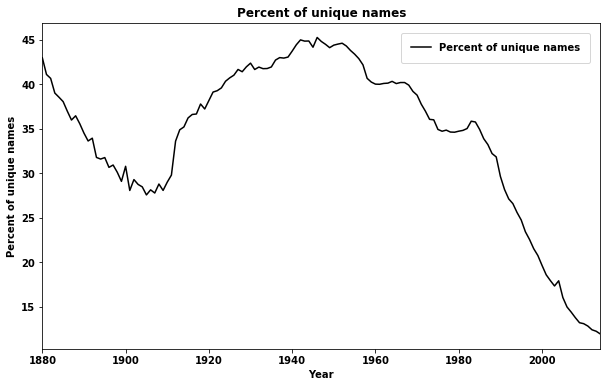

In [12]:
f, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim([1880, 2014])

plt.plot(years, percent_unique_names, label='Percent of unique names', color='black')

ax.set_ylabel('Percent of unique names')
ax.set_xlabel('Year')
ax.set_title('Percent of unique names')
legend = plt.legend(loc='best', frameon=True, borderpad=1, borderaxespad=1)
plt.show()

## 美剧对婴儿姓名的影响

In [22]:
def plot_name(name, gender, data):
    '''
    对姓名及性别进行可视化
    '''
    
    # 找到符合条件的数据
    data_named = data[(data.Name == name) & (data.Gender == gender)]
    
    plt.figure(figsize=(10, 6))
    
    #对数据的年份，数量进行可视化
    plt.plot(data_named.Year, data_named.Count, 'g-')
    plt.title('{} name variation over time'.format(name))
    plt.ylabel('counts')
    plt.xticks(data_named.Year, rotation='vertical')
    
    # 设置x轴数值范围
    plt.xlim([1985, 2015])

In [24]:
# 《老友记》姓名影响
friends_characters = [('Rachel', 'F'), ('Monica', 'F'), ('Phoebe', 'F'),
                     ('Rose', 'F'), ('Chandler', 'M'), ('Joey', 'F')]

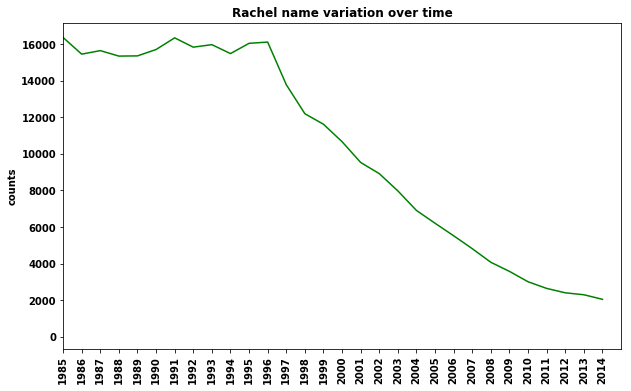

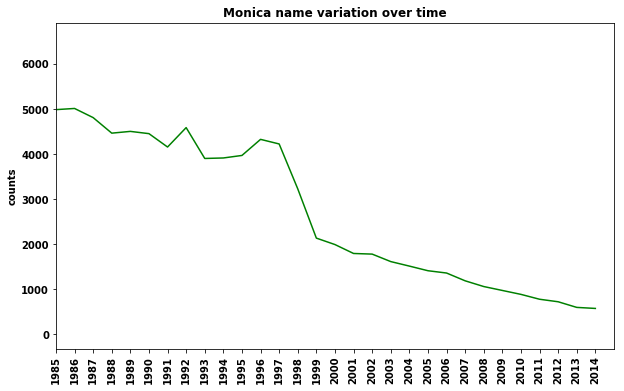

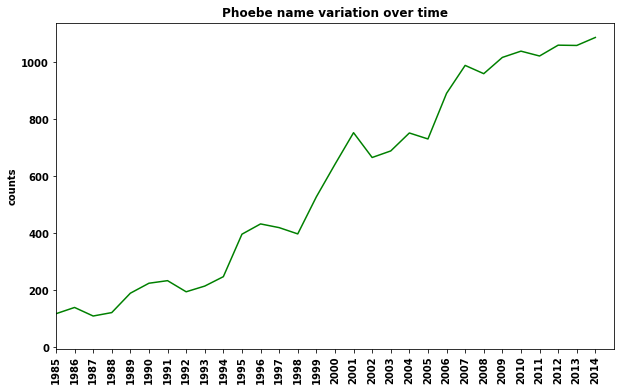

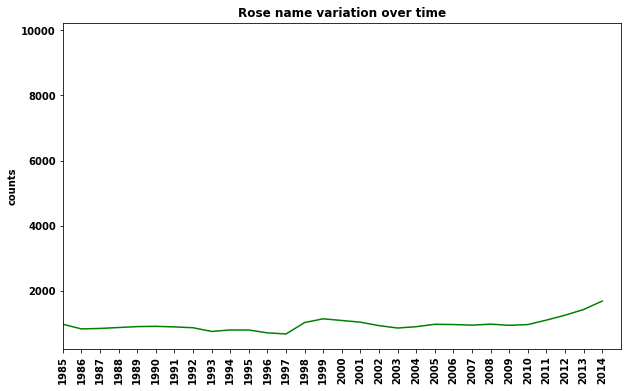

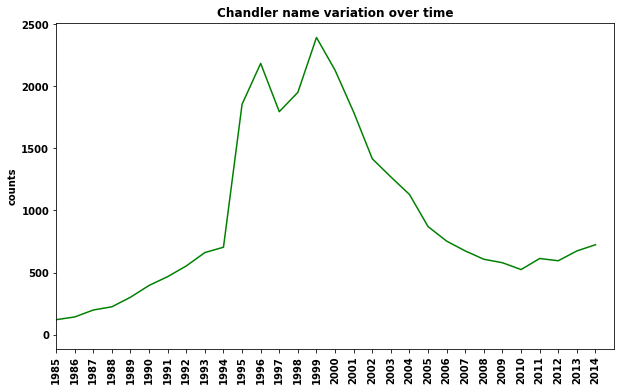

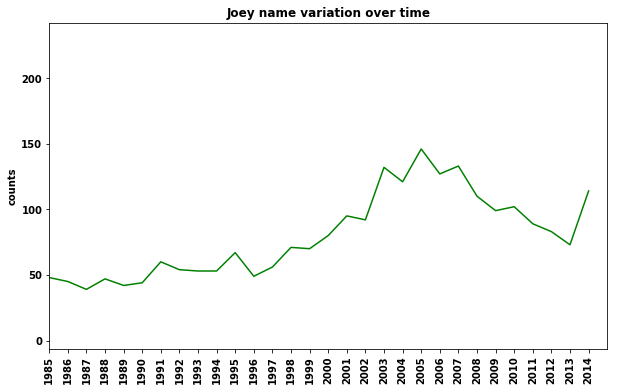

In [25]:
for character in friends_characters:   
    plot_name(character[0], character[1], data)

In [26]:
# 《冰与火之歌》和《生活大爆炸》姓名影响分析
more_characters = [('Khaleesi', 'F'), ('Sheldon', 'M')]

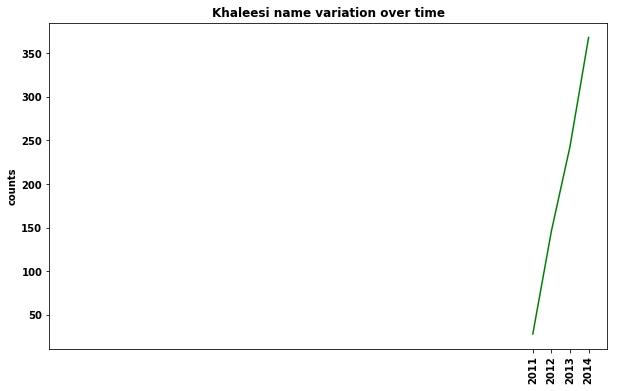

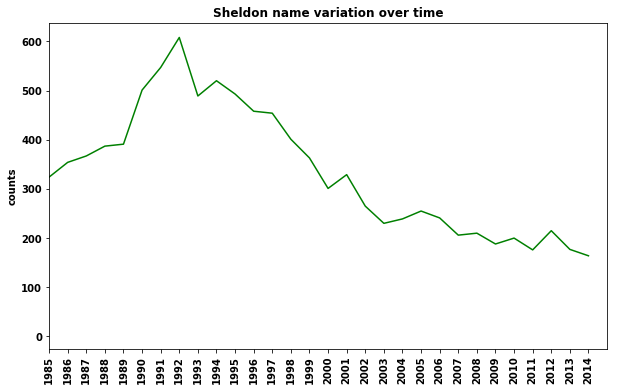

In [27]:
for character in more_characters:
    plot_name(character[0], character[1], data)